Create an ipython notebook to provide a tutorial showing the steps to perform dimensional reduction using https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka as the basis and a dataset of your choosing :
Your tutorial will  include

1. a short description of what is the dimensionality of the data and why and how to pick the dimensions for use

2, Initial Data setup

3. Dimensional reduction process

4. Display in graph and plots

5. Discussion of the images in the graphs and plots

6. Bibliography ( urls and names of pages and authors of used code and descriptions )  Be sure to put in 

  You should submit your ipython notebook url in your github account or zip your homework9 directory and  submit it.

Be sure that if someone downloads your directory the notebook will run as shown.  So any scripts or images used in the notebook

are local to the directory of the notebook.  You must have citations and references marked in the text.  You can use http://www.citationmachine.net  to help standardize your references at the end of you document

For more credit continue with the cluster analysis of the dimensionally reduced code

## Dimensionality Reduction (PCA)
When a data set has too many variables, it is often the case that some of the variables are not useful for analysis and some of them might be correlated. So, if we use these correlated variables together in our analysis, our predictions might go wrong. So, we might want to use only the "very important" variables for the analysis. So, in order to help with these issues, there are a couple of statistical techniques such as Factor Analysis, Principal Component Analysis (PCA).

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Load data set
diabetes = pd.read_csv("data/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [30]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# Define features
X = diabetes.iloc[:,0:8]

# Define categorical outcome 
y = diabetes.iloc[:,8]

# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

### Transform data into first two principal components (n=2)

In [27]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_std)

In [28]:
print("Original shape: %s" % str(X_std.shape))
print("Reduced shape: %s" % str(reduced_X.shape))

Original shape: (768, 8)
Reduced shape: (768, 2)


In [29]:
print(pca.components_)

[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]


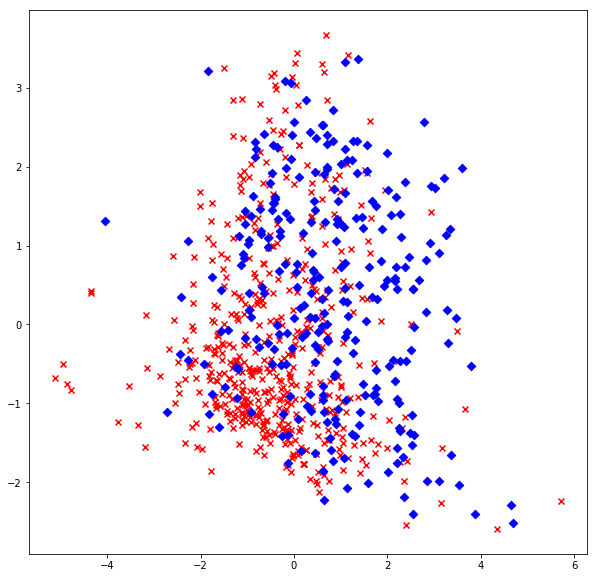

In [26]:
red_x, red_y = [], []
blue_x, blue_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
        
    else:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])

    
plt.figure(figsize=(10, 10))    
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.show()

In [20]:
# plot fist vs second principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=cancer.target, cmap=mglearn.tools.cm, s=60)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

NameError: name 'cancer' is not defined

### References

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/<br>
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data